In [1]:
import os
import matplotlib.pyplot as plt

In [2]:
cwd = os.getcwd()

ion_list = ["Li", "Na", "K", "F", "Cl", "Br"]

index_list = ["01", "02", "03", "04", "05", "06"]

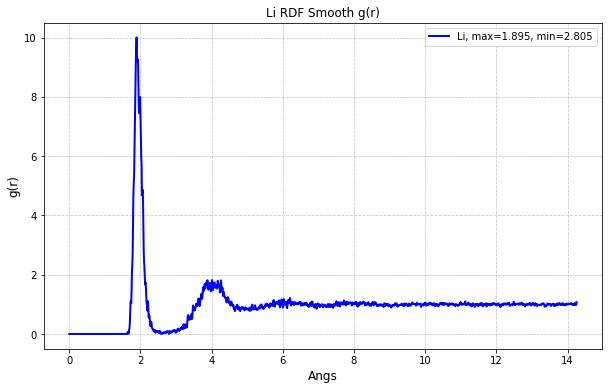

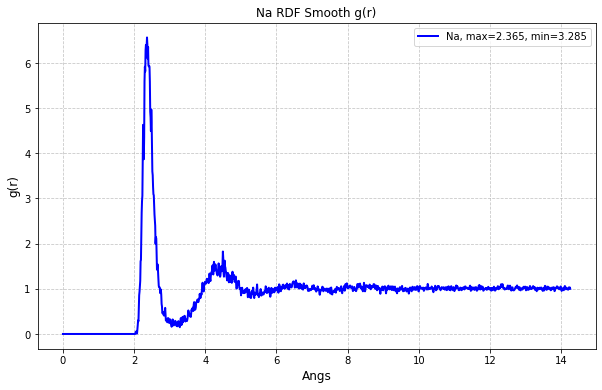

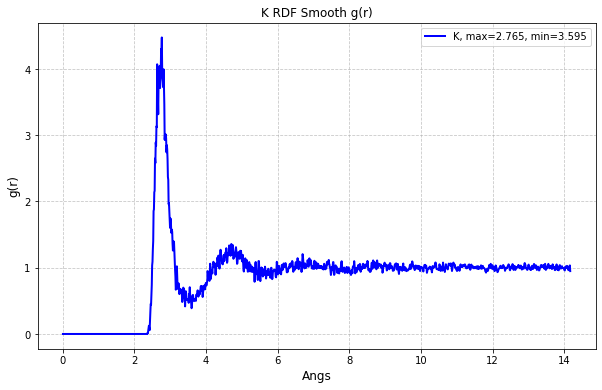

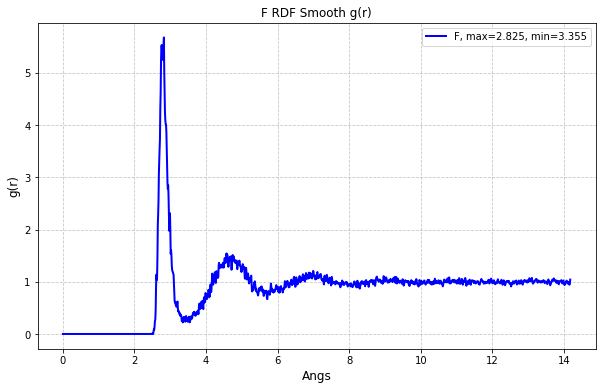

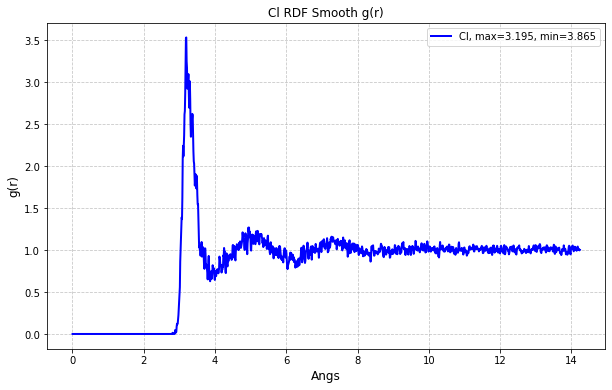

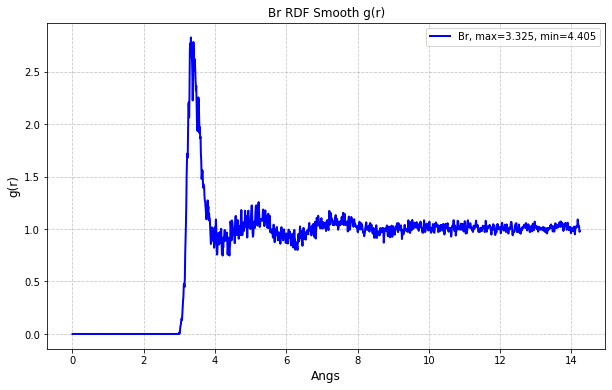

In [6]:
inner = []
outer = []
for i in range(len(ion_list)):
    ion = ion_list[i]
    index = index_list[i]
    fn = f"{cwd}/../SIM/{index}_{ion}/{ion}water.radial"
    
    f = open(fn, "r")
    lines = f.readlines()
    f.close()

    lines = [line.strip() for line in lines if line.strip()]

    start = 0

    for n,line in enumerate(lines):
        if line.split()[0] == "Bin":
            start = n
            break

    dist = []
    rawg = []
    smog = []
    for line in lines[32:]:
        split = line.split()
        dist.append(float(split[2]))
        rawg.append(float(split[3]))
        smog.append(float(split[4]))
    
    max_index = smog.index(max(smog))
    max_dist = dist[max_index]
    inner.append(max_dist)
    min_index = smog.index(min(smog[max_index:]))
    min_dist = dist[min_index]
    outer.append(min_dist)
    plt.figure(figsize=(10,6))  # Set the figure size
    plt.plot(dist, smog, label=f'{ion}, max={max_dist}, min={min_dist}', linewidth=2, linestyle='-', color='b')  # Set line properties
    plt.title(f'{ion} RDF Smooth g(r)')
    plt.xlabel('Angs', fontsize=12)
    plt.ylabel('g(r)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)  # Add a grid
    plt.legend()

In [7]:
inner

[1.895, 2.365, 2.765, 2.825, 3.195, 3.325]

In [8]:
outer

[2.805, 3.285, 3.595, 3.355, 3.865, 4.405]